## 7.1 ニューロンモデル

ニューラルネットワークはニューロンモデルを単位として構築される。

### 7.1.1 神経細胞

シナプス伝達強度が高いと、膜電位が閾値を超えて次の神経細胞にパルスが伝達される。

### 7.1.2 ニューロンモデル

- 出力は入力総和の平面を活性化関数に通したもの。
- 出力2クラスの分類：シグモイド関数  
    出力3クラスの分類：ソフトマックス関数

## 7.2 ニューラルネットワークモデル

### 7.2.1 ２層フィードフォワードニューラルネット

- ニューラルネットワークモデル  
    ニューロンの集合体のモデル
- フィードフォワードニューラルネット  
    信号が一方向のみに流れるモデル
- ダミーニューロン：バイアス項

### 7.2.2 ２層フィードフォワードニューラルネットの実装

In [2]:
import numpy as np

In [18]:
# データ生成
np.random.seed(seed=1) # 乱数を固定
N = 200 # データの数
K = 3 # 分布の数
T = np.zeros((N,3), dtype=np.uint8)
X = np.zeros((N,2))
X_range0 = [-3, 3] # X0の範囲、表示用
X_range1 = [-3, 3] # X1の範囲、表示用
Mu = np.array([[-.5, -.5], [.5, 1.0], [1, -.5]]) # 分布の中心
Sig = np.array([[.7, .7], [.8, .3], [.3, .8]]) # 分布の分散
Pi = np.array([0.4, 0.8, 1]) # 各分布への割合

'''
np.random.randで0~1の乱数生成、wkに代入
→wkがPiより小さいか確認
→ゼロ行列であるT[n,k]に1を代入
→代入したらループを出てまた新たな乱数を生成
'''
for n in range(N):
    wk = np.random.rand()
    for k in range(K):
        if wk < Pi[k]:
            T[n, k] = 1
            break
    '''
    テストデータを生成
    T[n,:]==1→0か１
    Sig[T[n, :] == 1, k]→Sig[0~1, 0~2]
    Mu[T[n, :] == 1, k]→Mu[0~1, 0~2]
    '''
    for k in range(2):
        X[n, k] = np.random.randn() * Sig[T[n, :] == 1, k] + Mu[T[n, :] == 1, k]

In [28]:
# ２分類のデータをテスト・訓練データに分割
TrainingRatio = 0.5
X_n_training = int(N * TrainingRatio)
X_train = X[:X_n_training, :]
X_test = X[X_n_training:, :]
T_train = T[:X_n_training, :]
T_test = T[X_n_training: ,:]

In [29]:
# データを'class_data.npz'に保存
np.savez('class_data.npz', X_train=X_train, T_train=T_train, X_test=X_test, T_test=T_test, X_range0=X_range0, X_range1=X_range1)

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

# データの図示
def Show_data(x, t):
    wk, n = t.shape
    c = [[0, 0, 0], [.5, .5, .5], [1, 1, 1]]
    for i in range(n):
        plt.plot(x[t[:, i]==1, 0], x[t[:, i] == 1, 1], linestyle='none', marker='o', markeredgecolor='black', color=c[i], alpha=0.8)
    plt.grid(True)

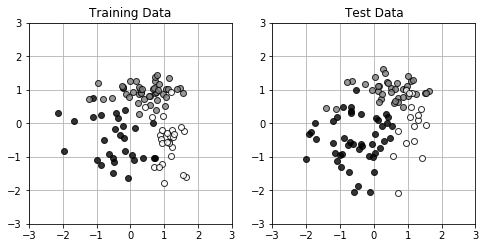

In [31]:
plt.figure(1, figsize=(8, 3.7))
plt.subplot(1, 2, 1)
Show_data(X_train, T_train)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.title('Training Data')
plt.subplot(1, 2, 2)
Show_data(X_test, T_test)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.title('Test Data')
plt.show()